In [1]:
from Game import *

Version:  0.2.38


In [2]:
def initial_state():
    state=Board(3,3)
    
    # state[0]=1 in cases where we need to have starting pieces
    return state

In [3]:
def valid_moves(state,player):
    
    # nope -- return [0,1,2,3,4,5,6,7,8]
    
    EMPTY=0
    X=1
    O=2
    
    moves=[]
    
    if state[0]==0:
        moves.append(0)
    if state[1]==0:
        moves.append(1)        
    if state[2]==0:
        moves.append(2)
        
    #....
    
    moves=[]
    for location in range(9):
        if state[location]==EMPTY:
            moves.append(location)
    
    
    return moves

In [4]:
def update_state(state,player,move):
    
    new_state=state
    
    new_state[move]=player
    
    return new_state

In [5]:
def three_in_a_row(a,b,c,player):
    
    if a==player and b==player and c==player:
        return True
    else:
        return False
    
    
    
def win_status(state,player):
    
    # 0 1 2
    # 3 4 5
    # 6 7 8
    
    if player==1:
        other_player=2
    else:
        other_player=1
    
    if three_in_a_row(state[0],state[1],state[2],player):
        return 'win'
    if three_in_a_row(state[3],state[4],state[5],player):
        return 'win'
    if three_in_a_row(state[6],state[7],state[8],player):
        return 'win'
    if three_in_a_row(state[0],state[3],state[6],player):
        return 'win'
    if three_in_a_row(state[1],state[4],state[7],player):
        return 'win'
    if three_in_a_row(state[2],state[5],state[8],player):
        return 'win'
    if three_in_a_row(state[0],state[4],state[8],player):
        return 'win'
    if three_in_a_row(state[2],state[4],state[6],player):
        return 'win'
    
    if not valid_moves(state,other_player):
        return 'stalemate'
    
    
def show_state(state):
    print(state)
    
    
    
def show_state(state):
    
    for i in range(9):
        if state[i]==1:
            print(" X ",end="")
        elif state[i]==2: 
            print(" O ",end="")
        else:
            print(" . ",end="")
            
        if i==2 or i==5:
            print()

In [6]:
def random_move(state,player):    
    moves=valid_moves(state,player)
    return random.choice(moves)
 
random_agent=Agent(random_move)    

In [7]:
def human_move(state,player):    
    print("""
    0 1 2
    3 4 5
    6 7 8
    """)
    move=int(input("What location do you want to move?"))
    return move
 
human_agent=Agent(human_move)    

In [8]:
from Game.minimax import *
def minimax_move(state,player):
    values,moves=minimax_values(state,player,maxdepth=20,display=True,cache=False)
    return top_choice(moves,values)
    
def heuristic(state,player):
    # returns between -1 and 1 (not inclusive)
    # approximate value of a state
    # positive = good for the player
    # negative = bad for player
    
    return 0

# material advantage
def heuristic(state,player):
    # returns between -1 and 1 (not inclusive)
    # approximate value of a state
    # positive = good for the player
    # negative = bad for player
    
    # count up my pieces, count up their pieces
    N_player=count_pieces(state,player)
    N_other=count_pieces(state,other_player)
    
    return (N_player-N_other)/(N_player+N_other)
    
    
    
    return 0




minimax_agent=Agent(minimax_move)

In [9]:
g=Game()
g.run(minimax_agent,random_agent)

====
Game  1
 .  .  . 
 .  .  . 
 .  .  .   Choice Time: 0.7022278308868408 seconds 
Player 1 moves 7
 .  .  . 
 .  .  . 
 .  X  . Player 2 moves 2
 .  .  O 
 .  .  . 
 .  X  .   Choice Time: 0.0697779655456543 seconds 
Player 1 moves 8
 .  .  O 
 .  .  . 
 .  X  X Player 2 moves 4
 .  .  O 
 .  O  . 
 .  X  X   Choice Time: 0.005179882049560547 seconds 
Player 1 moves 6
 .  .  O 
 .  O  . 
 X  X  X Player  1 won.


[1]

The first time it sees the initial state it takes 0.7 seconds to solve.  the second time it sees it,

In [10]:
g=Game()
g.run(minimax_agent,random_agent)

====
Game  1
 .  .  . 
 .  .  . 
 .  .  .   Choice Time: 0.0005521774291992188 seconds 
Player 1 moves 4
 .  .  . 
 .  X  . 
 .  .  . Player 2 moves 0
 O  .  . 
 .  X  . 
 .  .  .   Choice Time: 0.08649706840515137 seconds 
Player 1 moves 7
 O  .  . 
 .  X  . 
 .  X  . Player 2 moves 2
 O  .  O 
 .  X  . 
 .  X  .   Choice Time: 0.0031671524047851562 seconds 
Player 1 moves 1
 O  X  O 
 .  X  . 
 .  X  . Player  1 won.


[1]

it only takes 0.00055 seconds.  that's because of caching.  to really test minimax speed, we need to turn caching off in the minimax move (first introduced in version 0.2.37).  You need to restart the kernel and replace the minimax move with this version:

In [9]:
def minimax_move(state,player):
    values,moves=minimax_values(state,player,maxdepth=20,display=True,cache=False)
    return top_choice(moves,values)


In [11]:
g=Game()
g.run(minimax_agent,random_agent)

====
Game  1
 .  .  . 
 .  .  . 
 .  .  .   Choice Time: 1.995600938796997 seconds 
Player 1 moves 6
 .  .  . 
 .  .  . 
 X  .  . Player 2 moves 2
 .  .  O 
 .  .  . 
 X  .  .   Choice Time: 0.11496806144714355 seconds 
Player 1 moves 0
 X  .  O 
 .  .  . 
 X  .  . Player 2 moves 7
 X  .  O 
 .  .  . 
 X  O  .   Choice Time: 0.0070111751556396484 seconds 
Player 1 moves 3
 X  .  O 
 X  .  . 
 X  O  . Player  1 won.


[1]

In [12]:
g=Game()
g.run(minimax_agent,random_agent)

====
Game  1
 .  .  . 
 .  .  . 
 .  .  .   Choice Time: 2.0271759033203125 seconds 
Player 1 moves 3
 .  .  . 
 X  .  . 
 .  .  . Player 2 moves 8
 .  .  . 
 X  .  . 
 .  .  O   Choice Time: 0.11545586585998535 seconds 
Player 1 moves 6
 .  .  . 
 X  .  . 
 X  .  O Player 2 moves 4
 .  .  . 
 X  O  . 
 X  .  O   Choice Time: 0.0028638839721679688 seconds 
Player 1 moves 0
 X  .  . 
 X  O  . 
 X  .  O Player  1 won.


[1]

a bit more direct to test, make the state mid-game.  for TTT the depth is 6 and the breadth is around 9 to start, and gets smaller.  Seems like it takes 2 seconds for the first move.  let's test this by making an initial state.

In [14]:
state=initial_state()
print(state)
player=1
values=minimax_values(state,player,display=True,cache=False)

 0  0  0 
 0  0  0 
 0  0  0 

  Choice Time: 2.09578013420105 seconds 


2nd move takes how long?  (depth of 8, breadth starts at 8)

In [17]:
state=initial_state()
state[0]=1
print(state)
player=2
values=minimax_values(state,player,display=True,cache=False)

 1  0  0 
 0  0  0 
 0  0  0 

  Choice Time: 0.3265209197998047 seconds 


3rd move how long?

In [16]:
state=initial_state()
state[0]=1
state[2]=2
print(state)
player=1
values=minimax_values(state,player,display=True,cache=False)

 1  0  2 
 0  0  0 
 0  0  0 

  Choice Time: 0.16885089874267578 seconds 


and on....

In [22]:
player=1
other_player=2
state=initial_state()
for i in range(9):
    print(state)
    values=minimax_values(state,player,display=True,cache=False)
    state[i]=player
    player,other_player=other_player,player
    

 0  0  0 
 0  0  0 
 0  0  0 

  Choice Time: 2.070221185684204 seconds 
 1  0  0 
 0  0  0 
 0  0  0 

  Choice Time: 0.2913541793823242 seconds 
 1  2  0 
 0  0  0 
 0  0  0 

  Choice Time: 0.14878296852111816 seconds 
 1  2  1 
 0  0  0 
 0  0  0 

  Choice Time: 0.04307413101196289 seconds 
 1  2  1 
 2  0  0 
 0  0  0 

  Choice Time: 0.00895380973815918 seconds 
 1  2  1 
 2  1  0 
 0  0  0 

  Choice Time: 0.0018799304962158203 seconds 
 1  2  1 
 2  1  2 
 0  0  0 

  Choice Time: 0.00036787986755371094 seconds 
 1  2  1 
 2  1  2 
 1  0  0 

  Choice Time: 0.00023603439331054688 seconds 
 1  2  1 
 2  1  2 
 1  2  0 

  Choice Time: 7.605552673339844e-05 seconds 
  Choice Time: 1.1205673217773438e-05 seconds 


In [26]:
x=range(9)
y=[2.07,0.2913,0.1487,0.04204893112182617,0.008081197738647461,
  0.0018281936645507812,0.0003509521484375,0.00021195411682128906,7.605e-05]

In [27]:
%matplotlib inline
from pylab import *

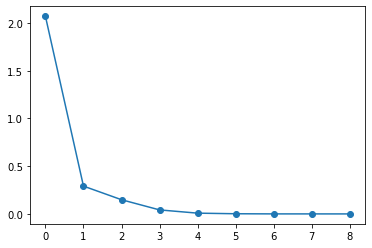

In [28]:
plot(x,y,'-o')

In [1]:
10**14/60/60/24/365

3170979.198376459

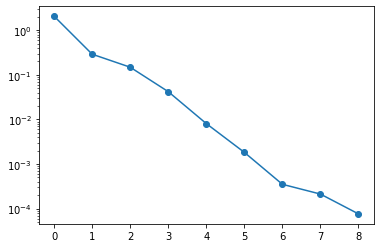

In [30]:
semilogy(x,y,'-o')


linear on a log plot is exponential!